# Построение моделей временных рядов

In [16]:
## импорт заивисимостей

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML

## Исходные данные

In [17]:
data = pd.read_csv("data_series.csv")
HTML(data.to_html(index=False))

t,y
1,27.3
2,41.8
3,42.8
4,56.2
5,72.5
6,56.0
7,70.0
8,74.9
9,103.3
10,111.3


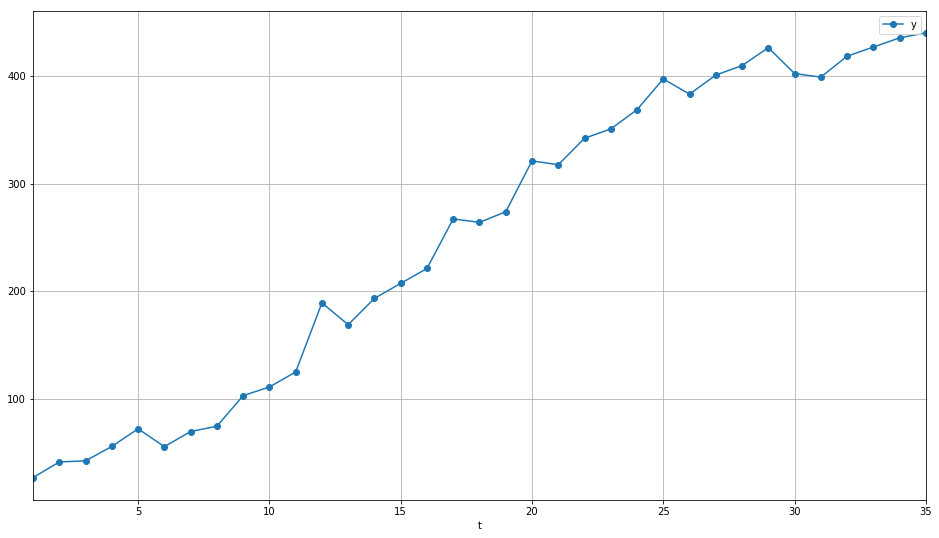

In [18]:
data.plot(x = 't', y = 'y', figsize=(16, 9), grid = True, marker='o')

## Модель Брауна

In [19]:
def segment_slope(d):
    X = d.iloc[:5, 0]
    Y = d.iloc[:5, 1]
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    n,d = 0,0
    for i in range(len(X)):
        n += (X[i] - X_mean)*(Y[i] - Y_mean)
        d += (X[i] - X_mean)**2
    b = n / d
    a = Y_mean - b*X_mean
    return a,b

In [20]:
a0,a1 = segment_slope(data)
print(a0, a1)

16.679999999999996 10.48


In [21]:
y = data.iloc[:, 1]
yth = []
e = []
yth.append(sum([a0,a1]))
e.append(y[0]-yth[0])
print(yth, e)
for i in range(1,len(y)):
    a0 = a0 + a1 + (1- 0.7**2)*e[i-1]
    a1 = a1 + (1 - 0.7)**2*e[i-1]
    yi = sum([a0,a1])
    yth.append(yi)
    e.append(y[i]-yi)

[27.159999999999997] [0.14000000000000412]


In [22]:
data.insert(2, 'yth', yth)
data.insert(3, 'e', e)
HTML(data.to_html(index=False))

t,y,yth,e
1,27.3,27.160000,0.140000
2,41.8,37.724000,4.076000
3,42.8,50.662200,-7.862200
4,56.2,56.804320,-0.604320
5,72.5,66.593570,5.906430
6,56.0,80.234881,-24.234881
7,70.0,76.322984,-6.322984
8,74.9,80.977086,-6.077086
9,103.3,85.209659,18.090341
10,111.3,103.395750,7.904250


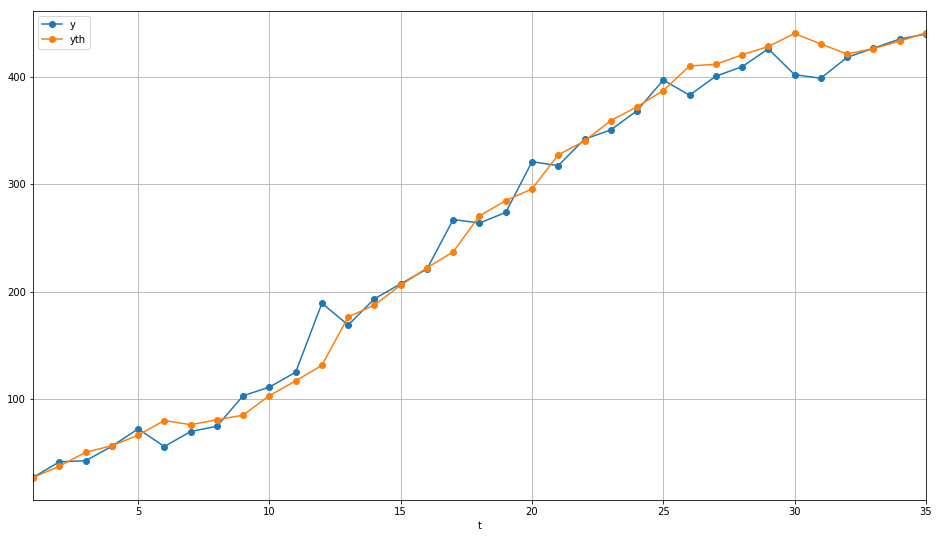

In [23]:
plot = data.plot(x = 't', y = ['y','yth'], figsize=(16, 9), grid = True, marker='o')

## Прогноз по модели Брауна на 5 шагов вперед

In [24]:
TAU = 6
p = [yth[len(yth)-1]]
X_arr = [len(yth)]
for i in range(1,TAU):
    yi = a0+a1*i
    p.append(yi)
print(p)

[440.95705421265683, 440.95705421265683, 447.7980206088457, 454.63898700503455, 461.47995340122344, 468.3209197974123]


In [25]:
for i in range(len(data['t'])+1, len(data['t'])+TAU):
    X_arr.append(i)
print(X_arr)

[35, 36, 37, 38, 39, 40]


In [26]:
j = 0
for i in X_arr:
    data = data.append({'t': i, 'pred': p[j]}, ignore_index = True)
    j+=1
HTML(data.to_html(index=False))

t,y,yth,e,pred
1.0,27.3,27.160000,0.140000,NaN
2.0,41.8,37.724000,4.076000,NaN
3.0,42.8,50.662200,-7.862200,NaN
4.0,56.2,56.804320,-0.604320,NaN
5.0,72.5,66.593570,5.906430,NaN
6.0,56.0,80.234881,-24.234881,NaN
7.0,70.0,76.322984,-6.322984,NaN
8.0,74.9,80.977086,-6.077086,NaN
9.0,103.3,85.209659,18.090341,NaN
10.0,111.3,103.395750,7.904250,NaN


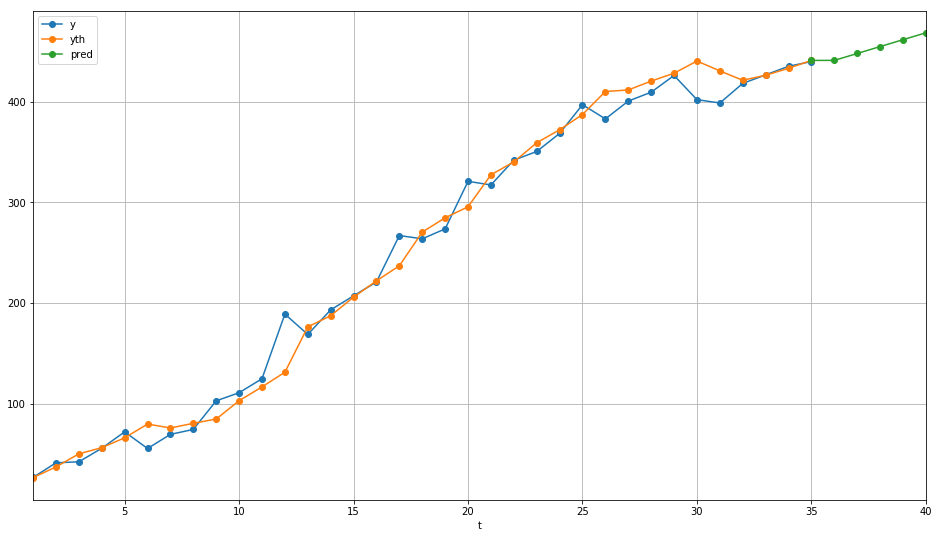

In [27]:
data.plot(x = 't', y = ['y','yth', 'pred'], figsize=(16, 9), grid = True, marker='o')